# ***PROBLEM STATEMENT: Fake News Detection***
***

>*The spread of misinformation and fake news has become a significant challenge in today's digital age. The dissemination of false information can have severe consequences on individuals, communities, and society as a whole. Detecting and combating fake news is crucial for maintaining the integrity of information and ensuring informed decision-making.*

>*The objective of this project is to develop a model for fake news detection. The system aims to automatically classify news articles as either real or fake based on their content and linguistic features. By accurately identifying fake news, the system can assist users in making informed judgments and help prevent the further spread of false information.*

>*The project will involve collecting a diverse dataset of news articles, including both real and fake examples. Various natural language processing (NLP) techniques will be applied to preprocess and extract meaningful features from the text data.*

>*Overall, this project aims to contribute to the development of effective techniques and tools for fake news detection, ultimately fostering a more informed and trustworthy information ecosystem.*

# ***Introduction***

---

>*Due to the advancement of technology, we all are having the flavor of ICT. ICT has made a new informational world or environment where all of us are connected via different digital means. This new environment is called the infosphere. Now we are just one click away from any information which is freely available on the internet. Now we are flooded with common knowledge and there is an abundant amount of news articles being published every day. When we open social media, we see different news. Not only these but also every day we receive hundreds of emails in our mailbox. But sometimes we can't believe different news or get confused by different articles as we don’t have surety about the authenticity of this news. The problem of fake news has become one of the most challenging issues having an impact on societies. Nowadays, false information may spread quickly through social media. In that regard, fake news needs to be detected as fast as possible to avoid negative influence on people who may rely on such information while making important decisions. Here fake news detection algorithms come into the picture. Our goal is to use different machine-learning algorithms to detect or classify a piece of news as fake or real. In recent years, different NLP (Natural Language Processing) methods have been proposed to solve the fake news detection problem. There are several algorithms such as LSTM, and the transformer-based model which use self-attention mechanisms to find semantic relationships or meanings of different words in any document. We can also use the power of LSA (Latent semantic analysis) to find latent features and to identify similarities and differences between genuine and fake news articles based on the language used in the text.*

# ***Importing Necessary Libraries***
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk import ngrams
from collections import Counter
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# ***Importing the dataset***
***

In [2]:
dataset=pd.read_csv("/kaggle/input/news-dataset/NEWS (1).CSV")

# ***Exploratory Data Analysis***
***

>*Exploratory Data Analysis (EDA) is an essential step in understanding and preparing the dataset for fake news detection in Natural Language Processing (NLP). Although the dataset consists of text data and categorical variables, EDA can still provide valuable insights. Following are the basic steps of EDA.*

>* ***Data Collection:*** *Gather the dataset and examine its structure, including column names and data types.*
* ***Data Cleaning:*** *Perform data cleaning tasks specific to text data. This includes removing any irrelevant or redundant information, handling missing values, and dealing with inconsistencies in the text.*
* ***Descriptive Statistics:*** *While the dataset may not have numerical variables, we can still calculate descriptive statistics for the text data. This includes determining the length of the text, identifying the most frequent words, or analyzing the distribution of the text length.*
* ***Data Visualization:*** *Use visualizations to gain insights into the text data. For example, word clouds can be created to visualize the most commonly occurring words in both real and fake news articles. Bar plots or pie charts can also illustrate the distribution of different categories or labels in the dataset.*
* ***Data Distribution:*** *Explore the distribution of categorical variables such as the "label" column. This will help understand the proportion of real and fake news articles in the dataset and determine if there is a class imbalance.*
* ***Variable Relationships:*** *Investigate relationships between variables by examining the co-occurrence of certain words in the "title" and "text" columns. This analysis can provide insights into common patterns or phrases associated with fake news.*
* ***Feature Engineering:*** *Explore potential features that can be derived from the existing data to improve the performance of fake news detection models. This may involve creating new features such as sentiment scores, readability metrics, or linguistic features based on the text data.*
* ***Hypothesis Testing:*** *While hypothesis testing may not be directly applicable to this specific dataset, it is still important to evaluate the significance of any observed patterns or differences between real and fake news articles. Statistical tests or measures can be employed to assess the significance of certain features or characteristics.*
* ***Data Preparation:*** *Prepare the data for further analysis and modeling tasks. This involves techniques such as text preprocessing, including tokenization, stop-word removal, and stemming/lemmatization. Additionally, encoding categorical variables and splitting the dataset into training and testing sets are crucial steps.*


>*By conducting EDA, we can gain a deeper understanding of the dataset, uncover patterns and characteristics specific to fake news, and prepare the data for subsequent modeling and analysis. These insights will aid in developing robust and accurate fake news detection models.*


## ***Shape of the dataset***
***

In [3]:
#Shape of the dataset
print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])

Number of rows: 6335
Number of columns: 5


## ***Column Names & their Data Types***
***

In [4]:
# Display the column names and their data types
print("\nColumn names and data types:")
print(dataset.dtypes)


Column names and data types:
Unnamed: 0.1     int64
Unnamed: 0       int64
title           object
text            object
label           object
dtype: object


# ***Info of the Data***
***

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  6335 non-null   int64 
 1   Unnamed: 0    6335 non-null   int64 
 2   title         6335 non-null   object
 3   text          6335 non-null   object
 4   label         6335 non-null   object
dtypes: int64(2), object(3)
memory usage: 247.6+ KB


## ***Summary of the Statistics***
***

In [6]:
# Display the summary statistics
print("\nSummary statistics:")
print(dataset.describe())


Summary statistics:
       Unnamed: 0.1    Unnamed: 0
count    6335.00000   6335.000000
mean     3167.00000   5280.415627
std      1828.90131   3038.503953
min         0.00000      2.000000
25%      1583.50000   2674.500000
50%      3167.00000   5271.000000
75%      4750.50000   7901.000000
max      6334.00000  10557.000000


## ***Available Data & Information***
***

> *Initially, it’s necessary to understand the dataset. To work with the dataset, it's crucial to know what features are present and the detail of different features.*

> *The dataset has 4 different features out of those 3 are independent features and 1 (Label) is the target feature.*

> *There are 6335 entries in the dataset. Below table shows the metadata of the dataset:*
><table>
  <thead>
    <tr>
      <th>Feature Name</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Unnamed</td>
      <td>int64</td>
      <td>An undefined column with numbers.</td>
    </tr>
    <tr>
      <td>title</td>
      <td>object</td>
      <td>The title of the news article.</td>
    </tr>
    <tr>
      <td>text</td>
      <td>object</td>
      <td>The main content of the news article.</td>
    </tr>
    <tr>
      <td>label</td>
      <td>object</td>
      <td>The category of the news article, either "Fake" or "Real".</td>
    </tr>
  </tbody>
</table>

## ***Checking for Missing Values***
***

>*In the process of analyzing our dataset, it is crucial to ensure the absence of missing values, as they can significantly impact the reliability of our results. Through a comprehensive examination, we have successfully confirmed the integrity of our dataset, as depicted in the plot below.*

### ***Visualizing Missing Entries***
***

>*The plot elegantly illustrates the absence of missing values within any of the dataset's columns. It effectively showcases the index or position of the entries, providing a clear indication of their completeness. Consequently, we can confidently assert that our dataset is devoid of any missing values, reinforcing the reliability and accuracy of our subsequent analyses.*

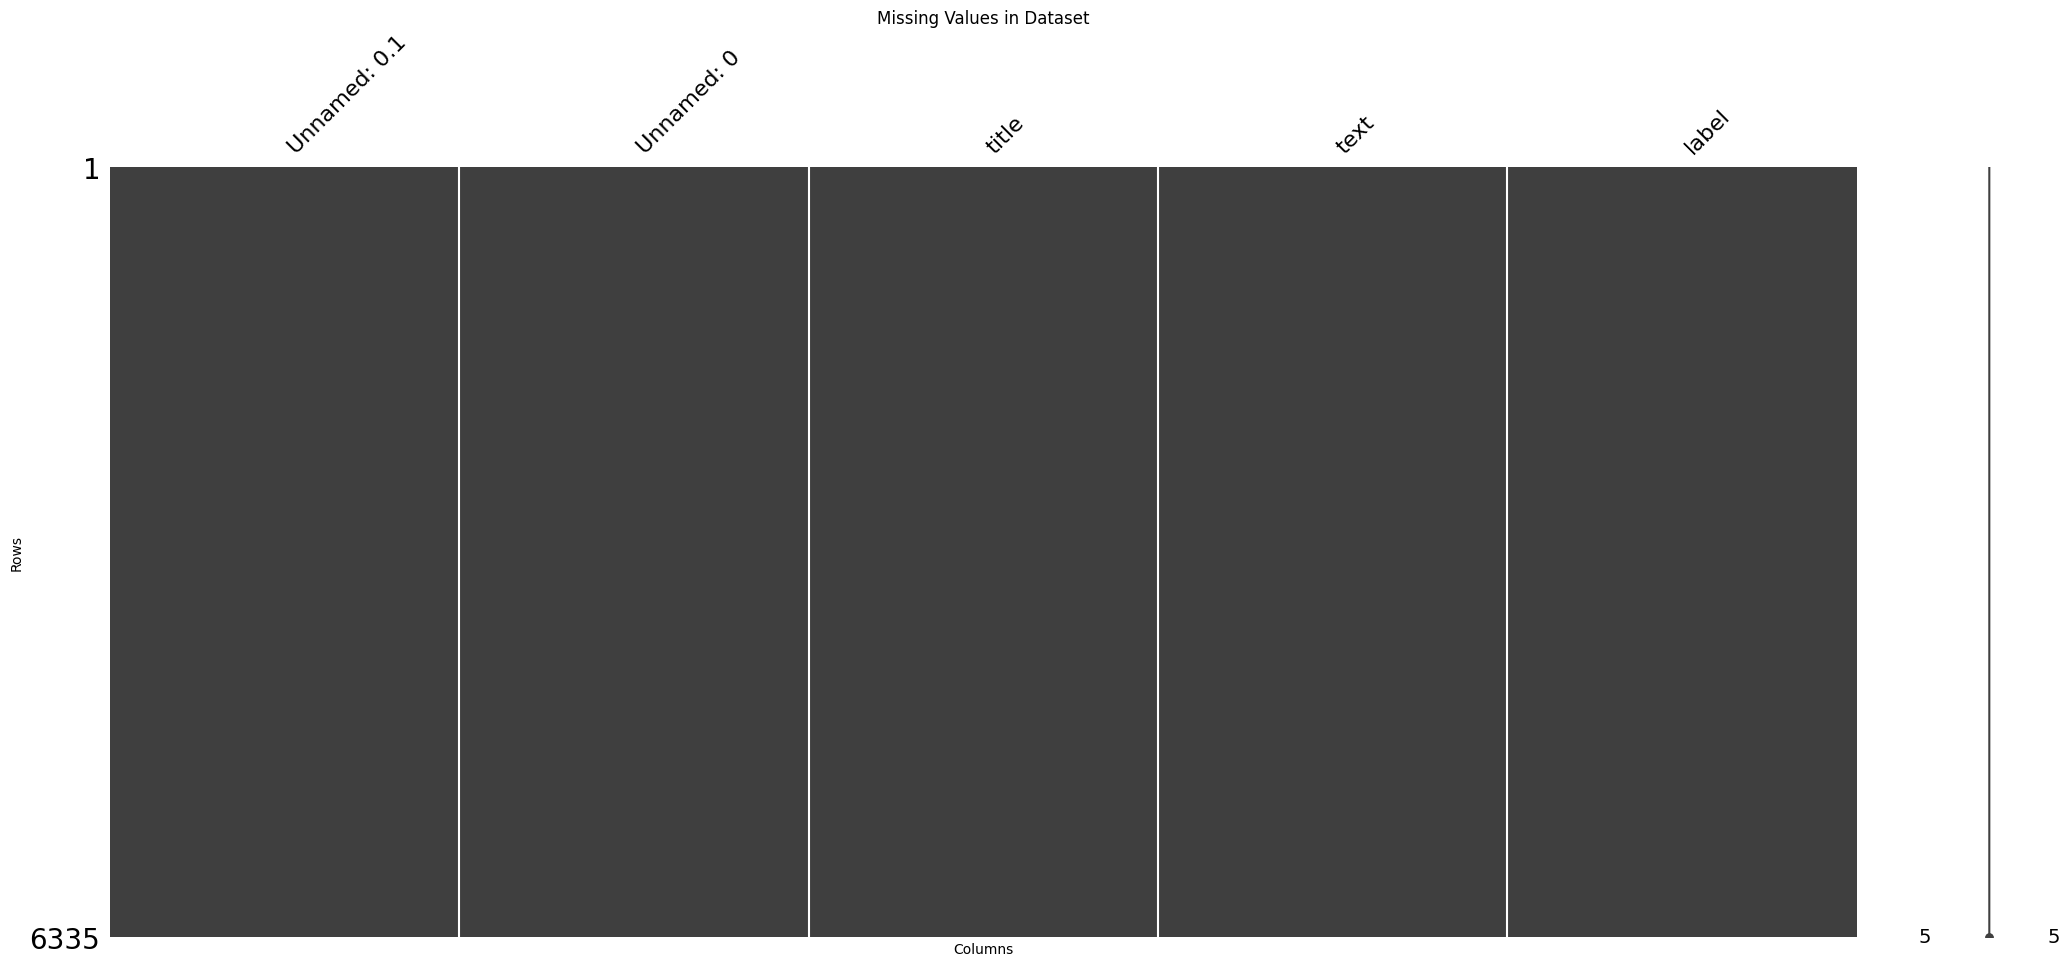

In [7]:
import missingno as msno   # For visualizing missing values
# Plot the missing values for each column
msno.matrix(dataset)

# Add title and labels to the plot
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

## ***Detecting the duplicates***
***

> *It's also necessary to check for any duplicate entries in the dataset. The duplicate entries will cause redundency so it's better to remove duplicates from the dataset.*

> *Here in the dataset there is no duplicated rows which means all rows represent an unique news.*

In [8]:
# Identify duplicate rows
duplicates = dataset[dataset.duplicated(keep=False)] #duplicated is a pandas library to check for duplicated rows in pandas dataframe
'''Here we used keep=Flase so that the first occurrence of a duplicate row is marked as "not a duplicate",
while subsequent occurrences are marked as "duplicate" and removed from the resulting DataFrame.'''

# Print the duplicate rows
if len(duplicates) > 0:
    print('Duplicate Rows:')
    print(duplicates)
else:
    print('No duplicates found.')

print("Total Duplicate Entries: ", len(duplicates))

No duplicates found.
Total Duplicate Entries:  0


## ***Removing the unwanted feature***
***

>*Here in the dataset the first column is undefined and is numberic which does not have any significance so we have decided to drop this column from our dataset.*


In [9]:
dataset=dataset[['title','text','label']]
dataset.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## ***Checking the Count of Fake and Real News***
***

>*In order to gain insights into the composition of our dataset, it is essential to examine the distribution of news articles across different categories. By conducting this analysis, we can effectively assess the balance between real and fake news entries.*

### ***Balanced Dataset Distribution***
***

>Our dataset consists of a total of 6,335 news articles, with 3,171 falling under the "real" category and 3,164 categorized as "fake." This distribution accounts for approximately 50.1% and 49.9% of the dataset, respectively. Such a balanced distribution ensures that both categories are adequately represented, eliminating the need for any up or downsampling techniques during the model building process.

### ***Benefits of a Balanced Dataset***
***

>*The balanced nature of our dataset holds significant advantages when it comes to modeling. Unlike imbalanced datasets, which tend to introduce bias and hinder model performance, a balanced dataset provides a fair representation of both classes. This equips our models with the ability to learn effectively from the available data, leading to more accurate and reliable predictions.*

In [10]:
# Calculate the value counts of the "label" column
counts=dataset["label"].value_counts()
print(counts)

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


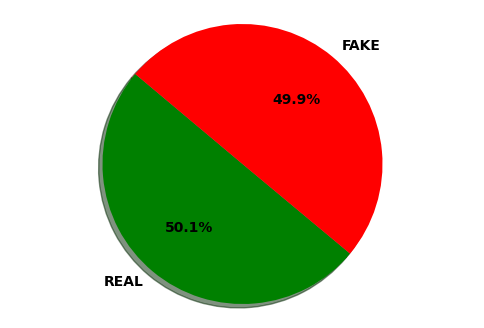

In [11]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the size as needed

# Create a pie chart with custom colors and shadow
colors = ['green', 'red']  # Red for Fake, Blue for Real
explode = (0.1, 0)  # Explode the 1st slice (Fake)
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
                                  startangle=140, colors=colors,  shadow=True)

# Customize the text appearance on the slices
for text in texts + autotexts:
    text.set_fontsize(10)  # Adjust font size
    text.set_fontweight('bold')  # Set text weight

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

# Add a title
#plt.title('Distribution of News Label', fontsize=12)

# Save the plot to a file (optional)
plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

# Display the plot
plt.show()

In [12]:
# Calculate the length of each article
dataset['article_length'] = dataset['text'].apply(lambda x: len(x.split()))

# Create a histogram using Plotly Express
fig = px.histogram(dataset, x='article_length', color='label', nbins=50)

# Update the layout to make the plot smaller
fig.update_layout(width=600, height=400)

# Show the plot
fig.show()

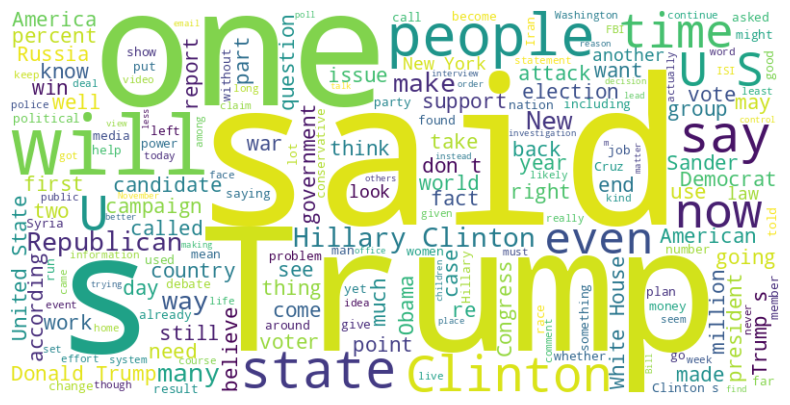

In [13]:
# Concatenate the text from 'title' and 'text' columns
text = ' '.join(dataset['title'].tolist() + dataset['text'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# Group the data by label and count the number of words in each article
dataset['word_count'] = dataset['text'].apply(lambda x: len(x.split()))
mean_word_count = dataset.groupby('label')['word_count'].mean().reset_index()

# Plot the average word count by label
fig = px.bar(mean_word_count, x='label', y='word_count', color='label',
             title='Average Word Count by Label')
fig.show()

## ***Exploratory Data Analysis (EDA) on Real News***
***

>*In this section, we will conduct a comprehensive exploratory data analysis (EDA) on real news articles. By utilizing various visualization techniques and analytical approaches, we aim to uncover valuable insights and gain a deeper understanding of this category.*

### ***Unveiling Insights and Patterns***
***

>*Through insightful visualizations, we will delve into the characteristics and patterns inherent in real news articles. These visualizations will provide us with a visual representation of trends, distributions, and potential correlations, enabling us to extract meaningful information.*

### ***Analyzing Key Attributes***
***

>*Our analysis will extend beyond visualizations as we explore key attributes of real news articles. By employing statistical measures and other analytical techniques, we will delve into factors such as article length, sentiment analysis, and keyword frequency. This exploration will provide valuable insights into the nature and nuances of real news.*

### ***Extracting Valuable Findings***
***

>*The overarching objective of this EDA is to extract valuable findings specific to real news. By combining visualizations and in-depth analysis, we anticipate uncovering patterns, biases, or any other noteworthy characteristics associated with this category. These findings will enhance our understanding of real news and serve as a foundation for subsequent analysis and modeling stages.*

In [15]:
dataset_real=dataset[dataset['label']=="REAL"].copy() #taking only the REAL news
dataset_real["title_text"]=dataset_real['title']+ ' ' +dataset_real["text"] #combining text and title
dataset_real

,title,text,label,article_length,word_count,title_text
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,431,431,Kerry to go to Paris in gesture of sympathy U....
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,317,317,The Battle of New York: Why This Primary Matte...
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,123,123,‘Britain’s Schindler’ Dies at 106 A Czech stoc...
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,2354,2354,Fact check: Trump and Clinton at the 'commande...
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,710,710,Iran reportedly makes new push for uranium con...
...,...,...,...,...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL,288,288,Alabama Lawmaker: Same-Sex Couples Don’t Deser...
6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL,370,370,GOP Senator David Perdue Jokes About Praying f...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,642,642,State Department says it can't find emails fro...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1120,1120,"In Ethiopia, Obama seeks progress on peace, se..."


## ***Text Preprocessing: Enhancing Data Quality***
***


>In the pursuit of refining our text data and improving its quality, we will employ various preprocessing techniques. By following a systematic approach, we aim to enhance the meaningfulness and consistency of the text, ensuring its suitability for further analysis. The key steps involved in this text preprocessing phase are as follows:

 > *1. ***Removal of Stopwords:*** Stopwords, which include common words like "a," "an," "the," and others, are devoid of substantial meaning and often act as connectors within sentences. By eliminating these stopwords, we can focus on the more informative and contextually relevant words, thereby enhancing the overall quality of the text.*

>*2.***Lowercasing Text:*** To establish uniformity and ease of analysis, all text will be converted to lowercase. This normalization process eliminates inconsistencies arising from variations in capitalization, ensuring accurate comparisons and facilitating subsequent analyses.*

>*3.***Handling Special Characters and Spaces:*** In order to streamline the text further, we will address any special characters, punctuation marks, symbols, or non-alphanumeric characters that may hinder the analysis. By removing these extraneous elements, we maintain data integrity and ensure a clean dataset.*

>*4.***Elimination of Empty Spaces:*** Empty spaces within the text can introduce discrepancies and adversely impact subsequent analyses. By identifying and removing these empty spaces, we create a well-structured and cohesive dataset that is ready for in-depth exploration.*

>*By executing these text preprocessing operations, we improve the overall quality of our data, setting the stage for more effective analysis and insightful discoveries. The resulting refined dataset will empower us to extract meaningful insights and make informed decisions.*



**Importing nltk library**

In [16]:

#!pip install nltk
#import nltk

#nltk.download('wordnet')
import nltk
import subprocess
nltk.download('stopwords') #to import necessary stopwords
# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet #to import english words that provides information about their meanings, relationships, and usage

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wo

**Defining function to perform preprocessing and cleaning**

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('not') #removing not from the stop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    text = re.sub(r'\W', ' ', text) # Remove all the special characters
    text = re.sub(r'\d+', '', text) # remove numerical values
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # remove all single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # Remove single characters from the start
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Substituting multiple spaces with single space
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split()) # perform lemmatization to get the root of english words
    return text

## ***Cleaning REAL News Data: Enhancing Data Quality***
***

>*In the cleaning phase, we will apply various techniques to improve the quality of the REAL news data. This process involves removing stopwords, converting text to lowercase, handling special characters, and eliminating empty spaces. These steps ensure that the data is refined, consistent, and ready for further analysis.*

In [18]:
dataset_real['title_text']=dataset_real['title_text'].apply(clean_text)
print(dataset_real['title_text'])

2       kerry go paris gesture sympathy s secretary st...
4       battle new york primary matter primary day new...
7       britain schindler dy czech stockbroker saved j...
8       fact check trump clinton commander in chief fo...
9       iran reportedly make new push uranium concessi...
                              ...                        
6324    alabama lawmaker same sex couple don deserve f...
6327    gop senator david perdue joke praying obama de...
6330    state department say can find email clinton sp...
6333    ethiopia obama seek progress peace security ea...
6334    jeb bush suddenly attacking trump here matter ...
Name: title_text, Length: 3171, dtype: object


## ***Generating WordCloud: Visualizing Key Terms in REAL News***
***

>*To gain deeper insights into the content and themes of the REAL news articles, we will employ the technique of generating a word cloud. A word cloud visually represents the frequency of words in a given dataset, with the size of each word reflecting its relative occurrence.*

>*By creating a word cloud specific to the REAL news category, we can easily identify the most commonly used words and phrases. These prominent terms offer valuable clues about the prevalent topics, trends, and concerns within the realm of real news. By visually highlighting these key terms, the word cloud provides an intuitive and impactful way to understand the focal points and emphasis in the REAL news articles.*

>*The generated word cloud will serve as a powerful visualization tool, enabling us to quickly grasp the overall themes, significant terms, and underlying patterns within the REAL news dataset. This visualization will enhance our understanding of the content and aid in further analysis and interpretation of the REAL news articles.*

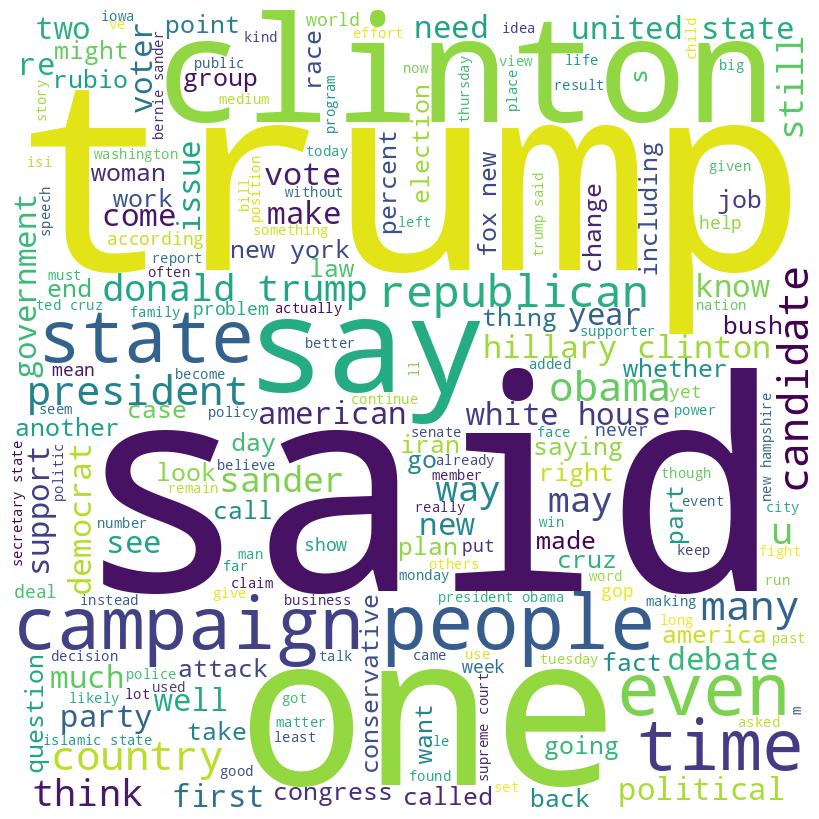

In [19]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews = ' '.join(dataset_real['title_text'])
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)
# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## ***Bar Plot of Most Frequent Words: Exploring Key Topics in REAL News***
***

>*In order to gain a comprehensive understanding of the REAL news dataset, we have constructed a bar plot showcasing the most frequent words within the text data. By utilizing tokenization, a process that converts the text into individual words or tokens, we are able to quantify the occurrence of each word and identify the most commonly used terms.*

>*The bar plot provides a visual representation of the frequency distribution of these words, enabling us to identify important topics and recurring themes within the realm of real news. By analyzing the relative heights of the bars, we can discern the prominence and significance of various terms, ultimately gaining valuable insights into the key subjects and discussions prevalent in the news articles.*

>*This visualization serves as a powerful tool to unravel the underlying patterns and priorities within the REAL news dataset. By pinpointing the most frequent words, we can uncover the important topics, trends, and concerns that shape the discourse surrounding real news. This information proves invaluable for researchers, analysts, and decision-makers seeking to comprehend the landscape of real news and make informed judgments.*

In [20]:
from collections import Counter #to count the occurance of each word
from nltk.tokenize import word_tokenize #to perform tokenization
# Tokenize the text data
tokens = word_tokenize(' '.join(dataset_real["title_text"])) # here all news are concatenated using join to get a single paragraph

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(tokens)

# Convert the word counts to a DataFrame and sort by frequency
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df.sort_values('count', ascending=False, inplace=True)

# Select the top 30 most frequent words
top_words_df = word_counts_df.head(30)

# Create a bar plot of the 30 most frequent words using Plotly
fig = go.Figure(data=[go.Bar(x=top_words_df.index, y=top_words_df['count'])])
fig.update_layout(title='Top 30 Most Frequent Words in Real News', xaxis_title='Words', yaxis_title='Frequency')
fig.show()

## ***Discovering Co-occurring Words within a Window Size of 3***
***

>*To uncover meaningful relationships and patterns between words within the text data, we have implemented a method to find co-occurring words within a window size of 3. This approach allows us to identify words that frequently appear together in close proximity. The following steps outline the process undertaken:*

>***1.Initialization of Co-occurrence Counter:***
*We begin by initializing an empty Counter object named "co_occurrence." This object will serve as a tool to count the co-occurrence of words within each sentence.*

>***2.Iteration over Sentences and Words:***
*We iterate over each sentence in the tokens list using a for loop. Within this loop, we further iterate over each word in the sentence using the enumerate() function. This function provides both the index and value of each word, facilitating subsequent operations.*

>***3.Identifying Word Pairs within Window Size:***
*For each word in the sentence, we loop over all possible pairs of words that appear within a window size of 3 of the current word. This is achieved using a nested for loop and range() with appropriate start and end indices. We ensure that the words in the pair are not equal to each other and are not included in the stop_words set.*

>***4.Identifying Word Triplets within Window Size:***
*If the words in the pair pass the aforementioned checks, we proceed to loop over all possible triplets of words that appear within a window size of 3 of the current pair. We apply similar checks to ensure the validity of the words in the triplet.*

>***5.Sorting and Storing Triplets:***
*Upon successful verification of the triplet, we sort the words in alphabetical order and store the triplet as a tuple. This step enhances consistency and facilitates subsequent analysis.*

>***6.Incrementing Co-occurrence Count:***
*Finally, we increment the count of the triplet in the co_occurrence Counter object. This enables us to keep track of the frequency of co-occurrence for each triplet, providing valuable insights into word associations within the given window size.*

>*By diligently executing these steps, we can effectively identify and quantify the co-occurrence of words within a window size of 3. This analysis helps reveal underlying connections and associations between words, shedding light on the semantic relationships and contextual usage within the text data.*

In [21]:
# Tokenize the text data
tokens = [word_tokenize(text.lower()) for text in dataset_real["title_text"]] #here each document is tokenized seperately

# Count co-occurring words within a window size of 3
co_occurrence = Counter()
for text in tokens:
    for i, word1 in enumerate(text):
        for j in range(max(0, i-3), i):
            if j < len(text) and text[j] != word1 and text[j] not in stop_words:
                for k in range(max(0, j-3), j):
                    if k < len(text) and text[k] != word1 and text[k] != text[j] and text[k] not in stop_words:
                        words = (word1, text[j], text[k])
                        co_occurrence[words] += 1

# Create a pandas DataFrame of co-occurring words with frequency count
co_occurrence_df = pd.DataFrame(list(co_occurrence.items()), columns=['words', 'count']) #dataframe to store pairs of word and count
co_occurrence_df = co_occurrence_df.sort_values(by='count', ascending=False) #sorting based on count

In [22]:
# Display the top 10 most frequent co-occurring word combinations
print(co_occurrence_df.head(50).to_string(index=False)) #setting index to false

                                words  count
                    (time, york, new)    368
           (obama, barack, president)    349
                     (cruz, ted, sen)    279
           (state, secretary, former)    239
                  (rubio, marco, sen)    222
(candidate, presidential, republican)    195
          (trump, donald, republican)    190
                    (news, fox, told)    186
          (report, press, associated)    184
           (state, united, president)    180
       (clinton, hillary, democratic)    180
                (sander, bernie, sen)    178
            (bush, george, president)    174
               (hampshire, new, iowa)    170
         (report, contributed, press)    166
     (contributed, press, associated)    166
    (report, contributed, associated)    165
              (act, care, affordable)    165
                    (city, york, new)    156
                 (kasich, john, ohio)    156
           (leader, majority, senate)    154
          

## ***Sentiment Analysis of REAL NEWS: Understanding Textual Sentiments***
***

>*Performing sentiment analysis on REAL NEWS articles allows us to gain valuable insights into the emotional tone and sentiment expressed within the text. The following subheadings outline the process and steps involved in this analysis.*

>***1.Sentiment Analysis Using SentimentIntensityAnalyzer:***
*The NLTK library provides a SentimentIntensityAnalyzer that utilizes a pre-trained model to determine the sentiment of a given text. This analyzer assigns polarity scores to words, enabling the classification of text into neutral, positive, or negative sentiments based on these scores.*

>***2.Tokenization:***
*Before conducting sentiment analysis, the text undergoes tokenization, which involves breaking it down into individual words within each sentence. Tokenization facilitates the analysis of sentiment for each word in the text.*

>***3.Polarity Score Calculation:***
*For each word in the tokenized text, polarity scores are computed to indicate the degree of positive or negative sentiment associated with the word. Neutral words receive a neutral polarity score. These scores collectively contribute to the overall sentiment analysis of the text.*

>***4.Overall Polarity Score:***
*To determine the overall sentiment of the text, the polarity scores of the individual words are aggregated. This computation provides an overview of the text's sentiment, reflecting its general tone and emotional disposition.*

>***5.Compound Polarity Score:***
*The compound polarity score is calculated based on the aggregated polarity scores, ranging from -1 (indicating a highly negative sentiment) to +1 (indicating a highly positive sentiment). A score of 0 represents a neutral sentiment. This compound polarity score plays a significant role in classifying the text based on its overall sentiment.*

>*By conducting sentiment analysis on REAL NEWS articles, we gain valuable insights into the sentiments expressed within the text. This analysis helps us better understand the prevailing attitudes, emotional nuances, and the overall tone conveyed by the news content.*

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer #importing the library
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a review
def classify_sentiment(review):
    # Use the sentiment analyzer to get the sentiment scores
    sentiment_scores = sia.polarity_scores(review)

    # Determine the overall sentiment label based on the sentiment score
    if sentiment_scores['compound'] >0:
        return 'Positive'
    elif sentiment_scores['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the compound score of a review
def get_compound_score(review):
    sentiment_scores = sia.polarity_scores(review)
    return sentiment_scores['compound']

# Apply the sentiment classifier to each review and create a new column
dataset_real['Sentiment'] = dataset_real['title_text'].apply(classify_sentiment)
dataset_real['compound_score'] = dataset_real['title_text'].apply(get_compound_score)

In [24]:
dataset_real["Sentiment"].value_counts()

Sentiment
Positive    1927
Negative    1211
Neutral       33
Name: count, dtype: int64

In [25]:
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_real['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_real['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_real['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_real.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
# Update the layout to make the plot smaller
fig.update_layout(width=400, height=400)
#fig.update_layout(title='Distribution of Sentiment of REAL NEWS')
fig.show()

## ***Exploratory Data Analysis (EDA) on FAKE News:***
***

>*Within this section, our focus shifts to conducting an exploratory data analysis (EDA) specifically on FAKE news articles. Through a series of visualizations and analytical techniques, we aim to uncover diverse insights and gain a deeper understanding of this distinct category.*

### ***Visualizing FAKE News***
***

>*By utilizing various visualization methods, we will delve into the characteristics and patterns unique to FAKE news articles. These visualizations will provide a comprehensive overview, highlighting trends, distributions, and potential correlations. Through these visual representations, we can extract meaningful information and uncover crucial insights.*

### ***Analyzing Key Attributes***
***


>*Our analysis will extend beyond visualizations as we explore key attributes specific to FAKE news articles. Through statistical measures and analytical techniques, we will delve into factors such as article length, language patterns, source credibility, or any other relevant aspects that provide valuable insights into FAKE news.*

### ***Extracting Valuable Findings***
***

>*The primary objective of this EDA is to extract valuable findings specific to FAKE news. By combining visualizations and in-depth analysis, we anticipate identifying patterns, biases, or any noteworthy characteristics associated with this category. These findings will contribute to our overall understanding of FAKE news, enabling us to make informed decisions and undertake subsequent analyses.*

In [26]:
dataset_fake=dataset[dataset['label']=="FAKE"].copy() #taking only the FAKE news
dataset_fake["title_text"]=dataset_fake['title']+ ' ' + dataset_fake["text"] #combining text and title
dataset_fake

,title,text,label,article_length,word_count,title_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296,1296,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446,446,Watch The Exact Moment Paul Ryan Committed Pol...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404,404,Bernie supporters on Twitter erupt in anger ag...
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,2346,2346,"Tehran, USA \nI’m not an immigrant, but my g..."
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,553,553,Girl Horrified At What She Watches Boyfriend D...
...,...,...,...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,489,489,DOJ COMPLAINT: Comey Under Fire Over Partisan ...
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,0,0,Radio Derb Is On The Air–Leonardo And Brazil’s...
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE,418,418,Assange claims ‘crazed’ Clinton campaign tried...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,2183,2183,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...


## ***Applying Cleaning Techniques to REAL News Data***
***

In this section, we focus on the crucial task of applying cleaning techniques to improve the quality of the REAL news data. By implementing various cleaning processes, we aim to ensure the data is refined, consistent, and ready for further analysis. The following steps outline the approach taken:

>***1.Removing Noise and Irrelevant Elements:***
*To enhance the meaningfulness and accuracy of the REAL news data, we begin by removing noise and irrelevant elements. This involves eliminating any unnecessary characters, symbols, or special characters that do not contribute to the informational content of the text.*

>***2.Handling Capitalization and Lowercasing Text:***
*In order to achieve consistency and facilitate analysis, we address capitalization by converting the text to a standardized format. By converting all text to lowercase, we eliminate discrepancies arising from variations in capitalization, ensuring accurate comparisons and more effective analysis.*

>***3.Treating Stopwords:***
*Stopwords, such as common words like "a," "an," "the," and others, offer little individual value and tend to appear frequently in the text. We remove these stopwords to focus on the more informative and significant words within the REAL news data, enabling a deeper understanding of the content.*

>***4.Dealing with Punctuation and Special Characters:***
*Punctuation marks and special characters may hinder analysis or introduce noise into the data. Therefore, we address these elements by removing or appropriately handling them. This ensures that the data is clean, standardized, and ready for subsequent processing.*

>***5.Eliminating Empty Spaces and Extra Whitespace:***
*Empty spaces and excessive whitespace within the text can lead to inaccuracies and inconsistencies. By eliminating these unwanted elements, we improve data quality and create a more streamlined dataset.*

*By diligently implementing these cleaning techniques, we enhance the overall quality and reliability of the REAL news data. This process ensures that the subsequent analysis and modeling stages are based on a robust foundation, leading to more accurate insights and informed decision-making.*

In [27]:
dataset_fake['title_text']=dataset_fake['title_text'].apply(clean_text)

## ***Visualizing Key Terms in REAL News with WordCloud***
***

>*To gain a visual representation of the most common words in the REAL news, we employ the technique of generating a word cloud. A word cloud offers an intuitive and impactful way to identify the prevalent terms within the dataset and understand their relative frequencies.*

>*By creating a word cloud specific to the REAL news category, we can quickly grasp the most frequently occurring words. The size and prominence of each word in the cloud are determined by its frequency within the text. Therefore, the larger and bolder a word appears in the word cloud, the more frequently it occurs in the REAL news articles.*

>*This visualization technique allows us to identify the significant topics, themes, and discussions that shape the REAL news landscape. By visually highlighting the most common words, the word cloud provides valuable insights into the content focus and helps us understand the key subjects and concepts covered within the REAL news articles.*

>*Generating a word cloud enables us to gain a comprehensive overview of the textual landscape, facilitating the exploration of important trends and patterns within the REAL news dataset. It serves as a powerful tool for researchers, analysts, and decision-makers to quickly identify the central themes and topics prevalent in the REAL news articles.*

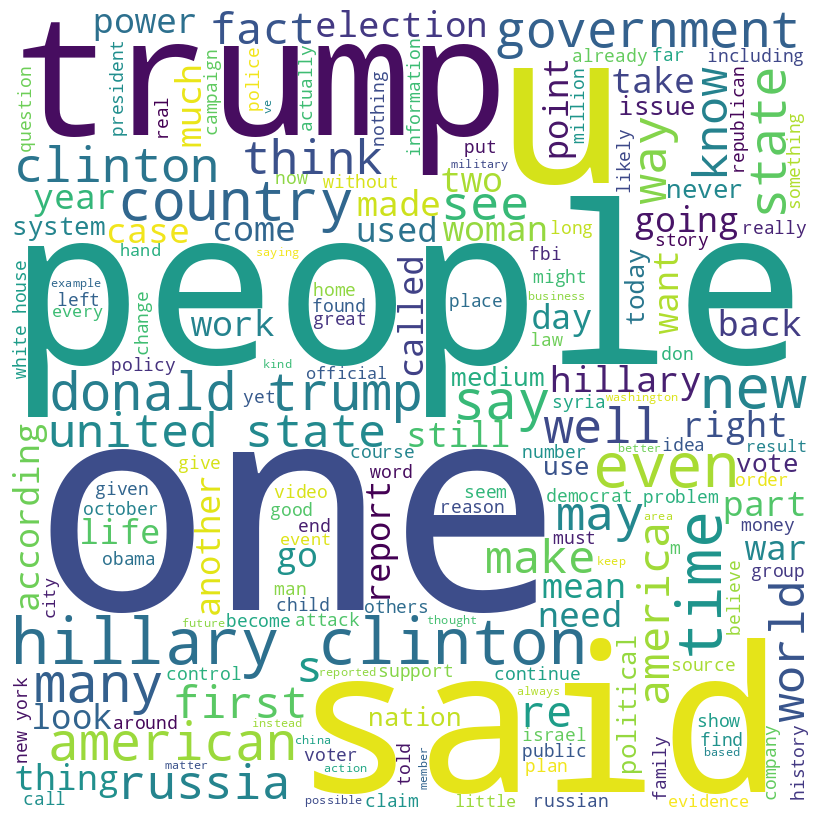

In [28]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews_fake = ' '.join(dataset_fake['title_text'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews_fake)

# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## ***Bar Plot of Most Frequent Words in REAL News***
***

>*To gain insights into the most common words used in REAL news articles, we have constructed a bar plot showcasing their frequency within the text data. This visualization provides a clear representation of the significant terms and enables the identification of important topics or themes frequently discussed in the news.*

>*The creation of the bar plot involved several steps, including tokenization and counting the occurrence of each word. Tokenization is the process of converting the document into individual words or tokens, allowing us to analyze their frequency accurately.*

>*By employing tokenization and generating the bar plot, we obtain a comprehensive overview of the most frequently used words in the REAL news. This visual representation facilitates the identification of prominent topics, enabling researchers, analysts, and readers to quickly grasp the core subjects and recurring themes within the news articles.*

>*Analyzing the most frequent words through a bar plot helps us understand the content focus and highlights the key subjects discussed within the realm of REAL news. This insight is valuable in uncovering important trends, biases, or patterns, ultimately enhancing our understanding of the information presented in the articles.*

In [29]:
from collections import Counter #to count the occurance of each word
from nltk.tokenize import word_tokenize #to perform tokenization
# Tokenize the text data
tokens_fake = word_tokenize(' '.join(dataset_fake["title_text"])) # here all news are concatenated using join to get a single paragraph


tokens_fake = [word for word in tokens_fake if len(word) > 2] #elimating the words having length less than 2

# Count the frequency of each word
word_counts = Counter(tokens_fake)

# Convert the word counts to a DataFrame and sort by frequency
word_counts_df_fake = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df_fake.sort_values('count', ascending=False, inplace=True)

# Create a bar plot of the 30 most frequent words using Plotly
fig = go.Figure(data=[go.Bar(x=word_counts_df_fake.index[:30], y=word_counts_df_fake['count'][:30])])
fig.update_layout(
    title='Top 30 Most Frequent Words in Fake News',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Frequency')
)
fig.show()

## ***Finding Co-occurring Words within a Window Size of 3: Exploring Word Associations***

>*In order to gain a deeper understanding of word associations within the REAL news dataset, we have implemented a method to identify co-occurring words within a window size of 3. This approach allows us to uncover meaningful relationships between words that frequently appear together in close proximity. The following steps outline the process undertaken:*

>***1.Initializing the Co-occurrence Counter:***
*We start by initializing an empty Counter object, which will be used to count the co-occurrence of words within each sentence. This Counter object provides a convenient way to track and quantify the occurrences of word pairs and triplets.*

>***2.Iterating over Sentences and Words:***
*Next, we iterate over each sentence in the REAL news dataset. Within this loop, we further iterate over each word in the sentence, utilizing the enumerate() function to retrieve both the index and value of each word. This enables us to access and analyze the surrounding words within the defined window size.*

>***3.Identifying Word Pairs within Window Size:***
*For each word in the sentence, we loop over all possible pairs of words that appear within a window size of 3 from the current word. By considering the neighboring words, we can identify co-occurring pairs that provide insights into word associations. It's important to note that we exclude pairs where the words are identical or fall within the stop_words set to focus on meaningful associations.*

>***4.Identifying Word Triplets within Window Size:***
*For the pairs of words that pass the previous checks, we proceed to identify all possible triplets of words that appear within the defined window size. This allows us to capture more comprehensive associations and patterns between words.*

>***5.Storing and Counting Co-occurring Triplets:***
*Once the valid triplets are identified, we sort the words in alphabetical order to ensure consistency. We store these triplets as tuples and increment their count within the co-occurrence Counter object.*

*By executing these steps, we extract valuable insights into the co-occurrence patterns of words within a window size of 3. This analysis enables us to identify common associations, collocations, and dependencies between words, shedding light on the semantic relationships and contextual usage within the REAL news dataset.*

In [30]:
# Tokenize the text data
tokens_fake = [word_tokenize(text.lower()) for text in dataset_fake["title_text"]] #here each document is tokenized seperately

# Count co-occurring words within a window size of 3
co_occurrence = Counter()
for text in tokens_fake:
    for i, word1 in enumerate(text):
        for j in range(max(0, i-3), i):
            if j < len(text) and text[j] != word1 and text[j] not in stop_words:
                for k in range(max(0, j-3), j):
                    if k < len(text) and text[k] != word1 and text[k] != text[j] and text[k] not in stop_words:
                        words = (word1, text[j], text[k])
                        co_occurrence[words] += 1

# Create a pandas DataFrame of co-occurring words with frequency count
co_occurrence_df_fake = pd.DataFrame(list(co_occurrence.items()), columns=['words', 'count']) #dataframe to store pairs of word and count
co_occurrence_df_fake = co_occurrence_df_fake.sort_values(by='count', ascending=False) #sorting based on count

In [31]:
# Display the top 10 most frequent co-occurring word combinations
print(co_occurrence_df_fake.head(50).to_string(index=False)) #setting index to false

                                words  count
                    (time, york, new)    265
                  (com, twitter, pic)    206
                     (com, www, http)    199
               (comey, director, fbi)    197
            (email, clinton, hillary)    187
             (comey, james, director)    170
                  (comey, james, fbi)    162
               (james, director, fbi)    160
          (force, brain, utm_content)    154
         (campaign, clinton, hillary)    143
           (state, united, president)    133
            (clinton, hillary, trump)    126
          (trump, donald, republican)    122
           (force, brain, utm_medium)    119
         (brain, utm_content, widget)    119
               (force, brain, widget)    119
     (brain, utm_content, utm_medium)    119
            (brain, utm_content, com)    119
           (pipeline, access, dakota)    111
        (clinton, investigation, fbi)    108
             (hillary, trump, donald)    105
          

**Sentiment Analysis of REAL NEWS**

In [32]:
# Apply the sentiment classifier to each review and create a new column
dataset_fake['Sentiment'] = dataset_fake['title_text'].apply(classify_sentiment)
dataset_fake['compound_score'] = dataset_fake['title_text'].apply(get_compound_score)

In [33]:
dataset_fake["Sentiment"].value_counts()

Sentiment
Positive    1595
Negative    1530
Neutral       39
Name: count, dtype: int64

In [34]:
'''
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_fake['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_fake['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_fake['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_fake.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, marker=dict(colors=colors))])
#fig.update_layout(title='Distribution of Sentiment of FAKE NEWS')
fig.update_layout(width=400, height=400)
fig.show()
'''
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_fake['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_fake['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_fake['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_fake.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
# Update the layout to make the plot smaller
fig.update_layout(width=450, height=400)
#fig.update_layout(title='Distribution of Sentiment of REAL NEWS')
fig.show()

## ***Analysis of Exploratory Data Analysis (EDA)***

>*Upon conducting the EDA, several insights can be derived from the word cloud, most frequent words, and co-occurrence analysis of both FAKE and REAL news datasets. The following observations shed light on the characteristics and distinguishing factors between the two categories:*

>***1.Commonality of Words:***
*The word cloud and most frequent words analysis reveal a significant overlap in terms used in both FAKE and REAL news. Most of these words pertain to political activities within the United States, including mentions of presidents, campaigns, elections, and the general population. This commonality suggests that word choice alone may not be sufficient to distinguish between FAKE and REAL news.*

>***2.Unique Words in FAKE News:***
*There are a few distinct words that appear more frequently in FAKE news compared to REAL news, such as "Russia," "War," "Not," and "email." The presence of these words may indicate a deliberate attempt in FAKE news to manipulate or mislead readers by including specific keywords.*

>***3.Co-occurrence of Words:***
*Analyzing the co-occurrence of three words provides additional insights. In FAKE news, several co-occurrences involve combinations like (com, www, HTTP), (server, email, clinton), (utm_source, utm_campaign, html), (utm_source, placement, tzrwu), and (utm_campaign, ims, force). These co-occurrences suggest the inclusion of URLs, HTTP markup, email links, and other keywords that might be used to manipulate readers or increase click-through rates on particular websites.*

>***4.Sentiment Analysis:***
*The sentiment analysis of REAL news reveals a predominantly positive sentiment, with a relatively smaller proportion of news articles having a negative sentiment. In contrast, FAKE news exhibits a higher percentage of articles with a negative sentiment. This difference implies that FAKE news might employ words or language with predominantly negative connotations compared to REAL news.*

*Overall, while there is an overlap in word usage between FAKE and REAL news, the presence of certain distinct words and patterns, along with differences in sentiment, can offer potential indicators for differentiating the two categories. However, further analysis and classification techniques may be necessary to effectively distinguish between FAKE and REAL news based on these findings.*

## ***Topic Modeling using Latent Semantic Analysis for REAL News: Unveiling Hidden Themes***

>*Topic modeling using Latent Semantic Analysis (LSA) allows us to uncover the underlying themes and concepts present in REAL news articles. By clustering similar words and identifying related terms, LSA helps us summarize the content of these articles and discover latent features within the dataset.*

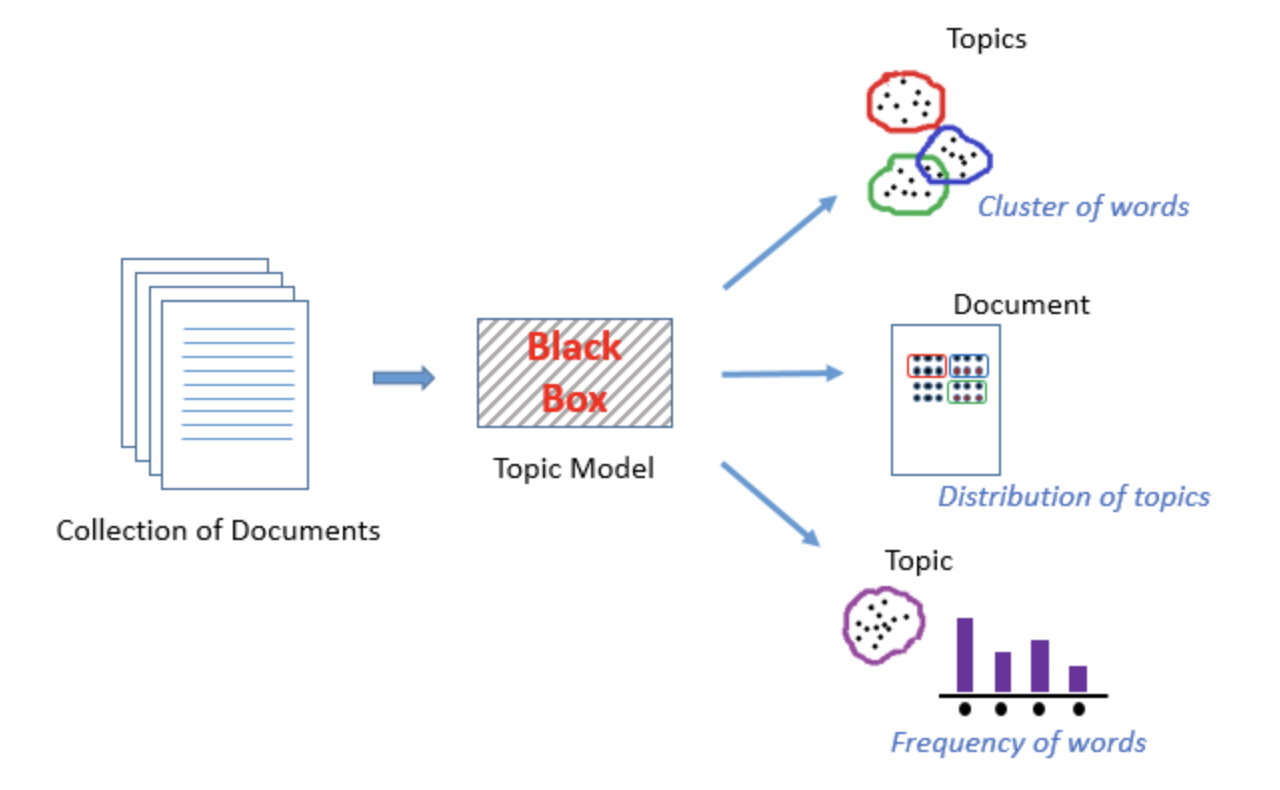

>***1.Understanding Synonymy and Polysemy:***
*In language, we encounter two key concepts: synonymy and polysemy. Synonymy refers to words that have similar or identical meanings, such as "happy" and "joyful." Polysemy, on the other hand, pertains to words with multiple meanings, like "bank" referring to a financial institution or the edge of a river. These concepts pose challenges for machines, as determining the intended meaning solely based on individual words can be problematic. LSA overcomes these limitations by capturing latent topics that contextualize the words used in the articles.*

>***2.The Role of LSA in Uncovering Topics:***
*Rather than solely mapping documents to words, LSA enables the discovery of latent topics that underlie the words' usage. By employing LSA, we can better understand the hidden concepts and themes within the REAL news articles. This approach helps bridge the gap between the limitations of machines and the contextual understanding humans possess.*

>***3.The Importance of TF-IDF:***
*Before implementing LSA, it is crucial to comprehend the concept of Term Frequency-Inverse Document Frequency (TF-IDF). TF-IDF identifies words that are important but less common within the corpus, which is the collection of all documents. The process involves calculating the Term Frequency (TF) to determine the frequency of each word in a document. The Inverse Document Frequency (IDF) measures the significance of a word in the entire corpus by considering the logarithm of the total number of documents divided by the number of documents containing that word. Multiplying TF by IDF yields the TF-IDF score, emphasizing the uniqueness and importance of words specific to individual documents or occurring in a limited number of documents.*

*By leveraging LSA and understanding the TF-IDF approach, we can effectively perform topic modeling on REAL news articles. This methodology helps us identify the hidden topics, extract meaningful insights, and gain a deeper understanding of the content presented in the dataset.*


***Reference:*** [*A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis (using Python)*](https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/?)



## ***Implementation of Latent Semantic Analysis (LSA)***
***



>*In this section, we will delve into the implementation of Topic Modeling using Latent Semantic Analysis (LSA) to extract latent topics from the REAL news dataset. The process involves several steps:*

>***1.Document-Term Matrix:***
*We begin by computing the document-term matrix, which has dimensions* A*B, where A represents the number of text documents and B represents the number of unique words in the dataset. The matrix is constructed using TF-IDF scores, which help identify the importance of each word in a document relative to the entire corpus.*

>***2.Dimensionality Reduction with SVD:***
*To reduce the dimensionality of the document-term matrix, we employ the widely-used dimensionality reduction algorithm called Singular Value Decomposition (SVD). SVD decomposes the matrix C into three other matrices: U, S, and Vᵀ (the transpose of matrix V).*

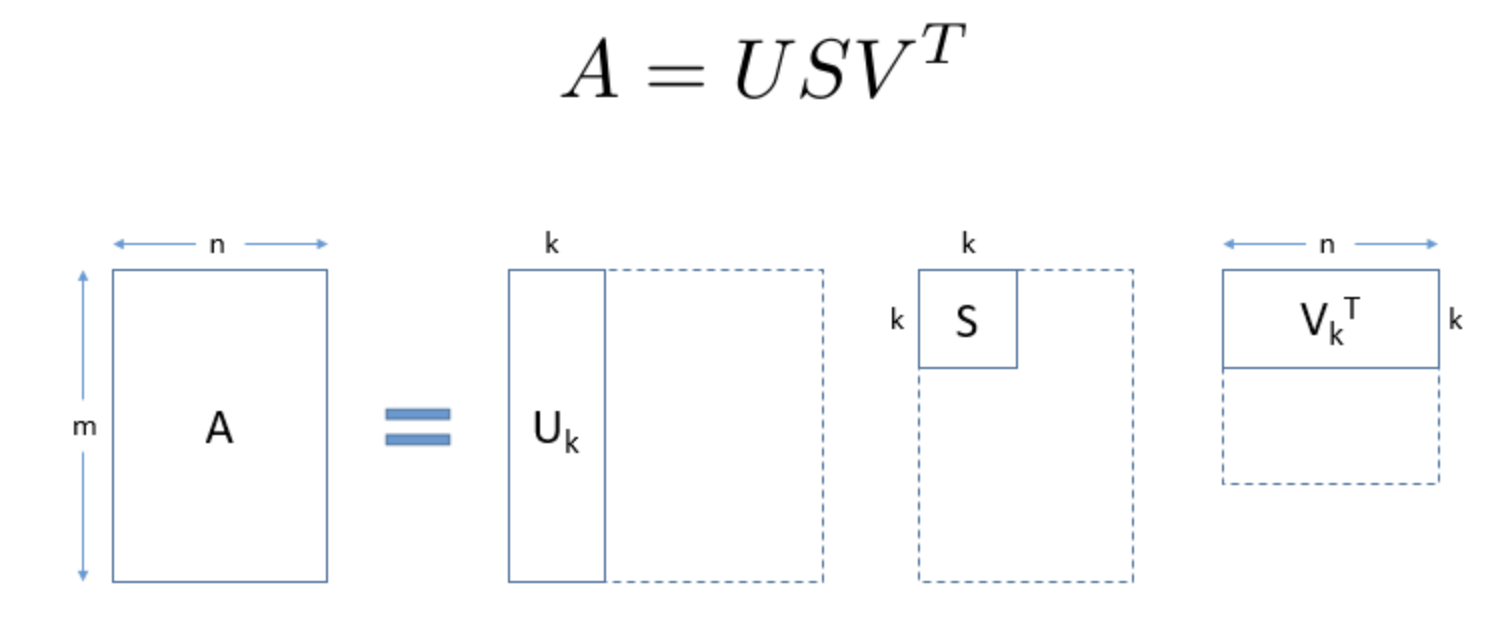

>***3.Matrix Decomposition:***
*The decomposition is represented as follows: C = USVᵀ, where U is an A x A unitary matrix, S is an A x B rectangular diagonal matrix with non-negative real numbers on the diagonal, and V is a B x B unitary matrix. The columns of U represent the left singular vectors of C, the columns of V represent the right singular vectors of C, and the diagonal entries of Σ represent the singular values of C.*

>***4.Vector Representation of Documents and Terms:***
*Each row of the matrix Uₖ (document-term matrix) represents the vector representation of the corresponding document. The length of these vectors is k, which corresponds to the desired number of topics. Similarly, the matrix Vₖ (term-topic matrix) provides vector representations for the terms in the dataset. These vectors can be utilized to identify similar words and documents within the corpus, enabling topic exploration and analysis.*

>***5.Exploring Similarity:***
*By leveraging the vector representations obtained from SVD, we can analyze the similarity between words and documents in the REAL news dataset. These representations enable us to find similar words based on their vector proximity and identify related documents that share similar topics. This information aids in discovering common themes and extracting insights from the dataset.*

>*The implementation of LSA and the subsequent analysis of the vector representations enable us to uncover latent topics within the REAL news dataset. By understanding the similarity and relationships between words and documents, we gain a deeper comprehension of the underlying themes and can further explore the content presented in the news articles.*




## ***Creating Document-Term Matix***

***

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer #importing TF-IDF
vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5, #terms that appear in more than 50% of the documents will be ignored
smooth_idf=True) # To add 1 to the numerator and denominator of the IDF calculation to avoid division by zero errors
X = vectorizer.fit_transform(dataset_real['title_text'])

X.shape # check shape of the document-term matrix

(3171, 1000)

## ***Topic Modeling - Vector Representation of Terms and Documents***
***

>*To transform the terms and documents in the document-term matrix into numerical vectors, we employ matrix decomposition, a technique that breaks down the larger matrix into smaller, more manageable matrices. This transformation allows us to represent the terms and documents in a numerical format, facilitating further analysis and topic modeling.*

>*In our case, we will utilize the TruncatedSVD class from the scikit-learn library to perform the matrix decomposition. TruncatedSVD is specifically designed to handle sparse matrices, such as our document-term matrix, efficiently. By applying TruncatedSVD, we can reduce the dimensionality of the matrix while preserving its important characteristics.*

>*Upon completion of the matrix decomposition, we obtain a set of numerical vectors that represent each term and document from the original matrix. These vectors serve as a compact and meaningful representation of the underlying topics present in the REAL news dataset.*

>*These numerical representations allow us to perform topic modeling and explore the relationships between terms and documents more effectively. By analyzing the patterns and similarities within these vectors, we gain insights into the latent topics and thematic structures within the REAL news dataset. This enables us to uncover hidden connections, identify important themes, and facilitate the interpretation of the textual data.*

In [36]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=40, algorithm='randomized', n_iter=100, random_state=122)
#considerting first 40 topics

svd_model.fit(X)

len(svd_model.components_) #number of topics

40

In [37]:
#printing the top 40 topics
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10] # to print first 10 terms

    topic_words = " ".join([t[0] for t in sorted_terms])
    print("Topic " + str(i) + ": " + topic_words)

Topic 0: trump clinton campaign sander party candidate cruz obama voter debate
Topic 1: trump cruz delegate donald campaign candidate clinton kasich poll rubio
Topic 2: clinton sander democratic email hillary bernie delegate campaign voter primary
Topic 3: cruz obamacare rubio tax reform bush pushing rule list administration
Topic 4: iran nuclear deal trump obama iranian sanction netanyahu clinton agreement
Topic 5: obamacare tax killing pushing list reform rule administration trump early
Topic 6: cruz sander rubio isi attack islamic delegate killing syria bush
Topic 7: bush clinton rubio email debate jeb christie iowa candidate carson
Topic 8: police iran cruz officer email nuclear department court clinton rubio
Topic 9: cruz house email court senate delegate boehner clinton ryan speaker
Topic 10: court marriage supreme gay sex sander religious justice law scalia
Topic 11: cruz percent delegate rate email poll job kasich voter department
Topic 12: voter poll percent election party cou

##***Topic Modeling using Latent Semantic Analysis for FAKE News***
***
>*Similar to the approach used for REAL News, we will apply Topic Modeling using Latent Semantic Analysis (LSA) to extract latent topics from the FAKE News dataset. By following the same steps as outlined earlier, we aim to uncover the underlying themes and patterns specific to the FAKE News category.*

##***Creating Document-Term Matix***
***

In [38]:
vectorizer_fake = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5, #terms that appear in more than 50% of the documents will be ignored
smooth_idf=True) # To add 1 to the numerator and denominator of the IDF calculation to avoid division by zero errors
X_fake = vectorizer_fake.fit_transform(dataset_fake['title_text'])

X_fake.shape # check shape of the document-term matrix

(3164, 1000)

##***Topic Modeling***
***

In [39]:
svd_model.fit(X_fake)

len(svd_model.components_) #number of topics

40

In [40]:
#printing the top 40 topics of FAKE news
terms = vectorizer_fake.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10] # to print first 10 terms

    topic_words = " ".join([t[0] for t in sorted_terms])
    print("Topic " + str(i) + ": " + topic_words)

Topic 0: trump clinton hillary election people email state fbi american said
Topic 1: clinton fbi hillary email investigation comey weiner campaign podesta server
Topic 2: trump donald election vote republican voter voting win supporter poll
Topic 3: russia russian syria war putin military nato clinton syrian nuclear
Topic 4: fbi comey investigation trump director letter james weiner police said
Topic 5: election voting voter vote police ballot machine fraud state pipeline
Topic 6: police mosul isi pipeline said video officer dakota syria trump
Topic 7: russian russia com video election email putin voter twitter october
Topic 8: police pipeline dakota protester standing rock water russia protest clinton
Topic 9: email gold trump saudi market podesta percent mosul isi bank
Topic 10: email israel com podesta wikileaks text muslim address click post
Topic 11: war com hillary pipeline world saudi dakota water http www
Topic 12: obama video com white president house hillary black obamacare 

##***Outcome Analysis - Comparing Topics in FAKE and REAL News***
***
>*Upon analyzing the outcomes of the topic modeling process for both FAKE and REAL news, several interesting findings emerge. While there are significant similarities between the topics, there are also notable differences, which can be summarized as follows:*

>***Similarities:***
>***

>***Prominent Figures:*** *Both FAKE and REAL news topics include references to prominent figures such as Trump, Clinton, Comey, Putin, and Obama. This suggests their substantial presence and influence in the news landscape during the given period.*

>***Common Themes:*** *Certain common themes can be identified across topics in both FAKE and REAL news. These include references to the 2016 U.S. presidential election, email-related controversies, police issues, Syria, and Russia's involvement in global affairs.*

>***Election Context:*** *Both sets of topics touch upon subjects related to voting, elections, voter fraud, and ballot machines. While the contexts and perspectives may differ, these themes demonstrate their significance in the news narratives.*

>***Dissimilarities:***
>***

>***Specific Topics in REAL News:*** *REAL news topics encompass a more diverse range of subjects, including healthcare (Obamacare), gun control, climate change, Supreme Court decisions, immigration, police shootings, and international agreements such as the Iran nuclear deal. These specific topics reflect the broader scope of news coverage on social, political, and environmental issues.*

>***Broader Themes in FAKE News:*** *FAKE news topics tend to focus on broader themes such as Russia's involvement in various contexts, email controversies surrounding Clinton and Podesta, wars/conflicts (Syria, Iraq, Yemen), and global events like the Israeli-Palestinian conflict and the crisis in Mosul. Additionally, FAKE news topics include references to financial markets, gold, silver, banks, and the economy, which are not prominently featured in the topics of REAL news.*

>***Social Issues Coverage:*** *REAL news topics cover social issues like race, religion, and different rights more extensively compared to FAKE news topics, where these aspects are relatively less prominent.*

>*These findings highlight the overlapping themes and shared references between FAKE and REAL news, underscoring the complexity of news content and the influence of common narratives. However, the differences in specific topics and coverage reveal the distinct foci and priorities within each category.*

## ***Model Building - Interpretable ML, Ensemble, and Deep Learning***
***

>*In this section, we will develop three types of models to analyze and predict news articles: interpretable machine learning models (Decision Trees), ensemble models (Random Forest), and deep learning models. Decision Trees provide clear insights into the decision-making process, Random Forest combines multiple trees for improved performance, and deep learning models capture complex patterns. By comparing their results, we can choose the most suitable approach for predicting the nature of news articles.*




##***Decision Tree***
***

>*A Decision Tree Classifier is a popular machine learning algorithm used for both classification and regression tasks. It is a non-linear and non-parametric algorithm that makes decisions by recursively splitting the data into subsets based on the values of input features. Each split is designed to separate the data into distinct classes or groups, eventually forming a tree-like structure.*

>*Here it performs split in such a way that it can increase the information gain (information gain measures how much more information we gain about the target variable by splitting the node based on a particular feature) and reduce the Entropy and Gini Impurity. Entropy is the measure of Randomness or uncertainty in the data. In general, it is used to measure the impurity in a node. The entropy is 0 when all the data in the node belong to the same class meaning the node is pure, and it is larger when the data are more evenly split between different classes which means the node is impure.*

>**How Decision Tree Classifier Works:**

>* ***Data Splitting:*** *The decision tree starts by analyzing the entire dataset at the root node. It selects the best feature (or attribute) to split the data based on certain criteria. The goal is to find the feature that provides the most significant separation between classes.*

>* ***Node Creation:*** *The selected feature is used to create a decision node, which acts as a binary question. The data is divided into two subsets based on the feature's value: one branch for the data that satisfies the condition (e.g., feature value > 5), and another branch for the data that does not.*

>* ***Recursive Process:*** *The process of data splitting and node creation is repeated for each subset (branch) created in the previous step. It continues until all data points in a branch belong to the same class or meet a predefined stopping criterion.*

>* ***Leaf Nodes:*** *When the algorithm reaches a point where it can no longer split the data effectively, it creates leaf nodes. Each leaf node represents a specific class or category, and the data points that end up in the leaf node are assigned to that class.*

>* ***Decision Rules:*** *The decision tree forms a set of decision rules based on the tree structure. These rules can be used to classify new, unseen data by following the path from the root node to a specific leaf node.*

##***Preparing Data for Model***
***

>*We have to prepare data for training and testing the model. It includes separating the dependent and independent variables and splitting the dataset into train and test sets. So far we have worked with FAKE and REAL news data separately but for the model, we need to consider both at the same time. So we need to perform preprocessing in the combined dataset.*

In [41]:
dataset_model=dataset.copy() #creating a copy of the original dataset
dataset_model["title_text"]=dataset_model['title']+ ' ' + dataset_model["text"] #combining text and title
dataset_model.columns

Index(['title', 'text', 'label', 'article_length', 'word_count', 'title_text'], dtype='object')

In [42]:
#Changing Label from Object to Binary
dataset_model['label'] = dataset_model['label'].replace({'FAKE': 0, 'REAL': 1})
dataset_model

,title,text,label,article_length,word_count,title_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,1296,1296,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,446,446,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,431,431,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,404,404,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,317,317,The Battle of New York: Why This Primary Matte...
...,...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1,642,642,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,2183,2183,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0,1947,1947,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1,1120,1120,"In Ethiopia, Obama seeks progress on peace, se..."


In [43]:
#Cleaning the text
dataset_model['title_text']=dataset_model['title_text'].apply(clean_text)

In [44]:
#Seperating Independent and Dependent Variable
X=dataset_model['title_text']
y=dataset_model['label']

In [45]:
#Performing train test split 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [46]:
#Converting text to vectore using TF-IDF considering 1000 words
x_train_vector= vectorizer.fit_transform(x_train)
x_test_vector=vectorizer.transform(x_test)
print(x_train_vector.shape)
print(x_test_vector.shape)

(5068, 1000)
(1267, 1000)


In [47]:
#Training the model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
classifier_dt= DecisionTreeClassifier()
classifier_dt.fit(x_train_vector,y_train)

DecisionTreeClassifier()

Accuracy: 0.8113654301499605


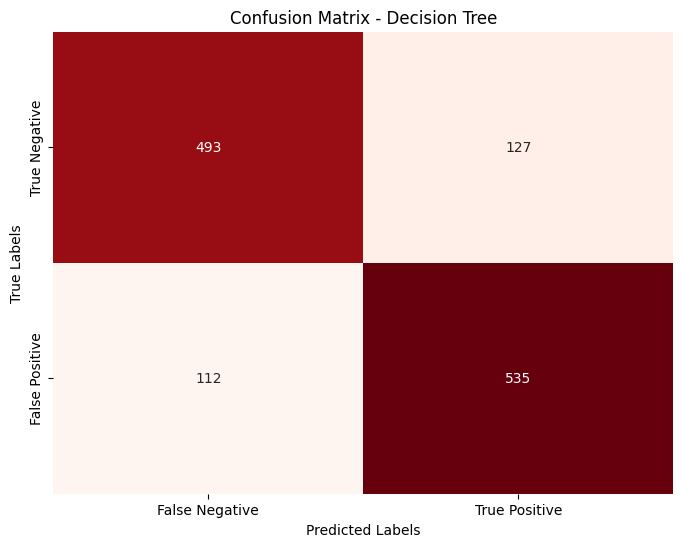

In [48]:
#Checking the performance of the model
from sklearn.metrics import accuracy_score,confusion_matrix
#Making prediction on test set
y_pred = classifier_dt.predict(x_test_vector)
#checking the accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#checking the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the categories for the confusion matrix
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Convert confusion matrix to a DataFrame
confusion_df = pd.DataFrame(confusion_mat, index=categories[:2], columns=categories[2:])

# Plot the confusion matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

##***Random Forest***
***

>*It's an ensemble algorithm that uses bagging. It uses Bootstrap sampling to repeatedly draw samples with replacements from the original dataset to create new datasets of the same size. Unlike the decision tree instead of considering only one tree it considered multiple trees to make a decision. After performing different computations the final decision is made by majority voting among all the trees available which made different decisions.*

In [49]:
#Training the model (Random Forest) with default parameters (by default 100 trees will be considered)
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=0) #setting random state 0 to make reproducible result over different run
classifier_rf.fit(x_train_vector, y_train)


RandomForestClassifier(random_state=0)

Accuracy: 0.8997632202052092


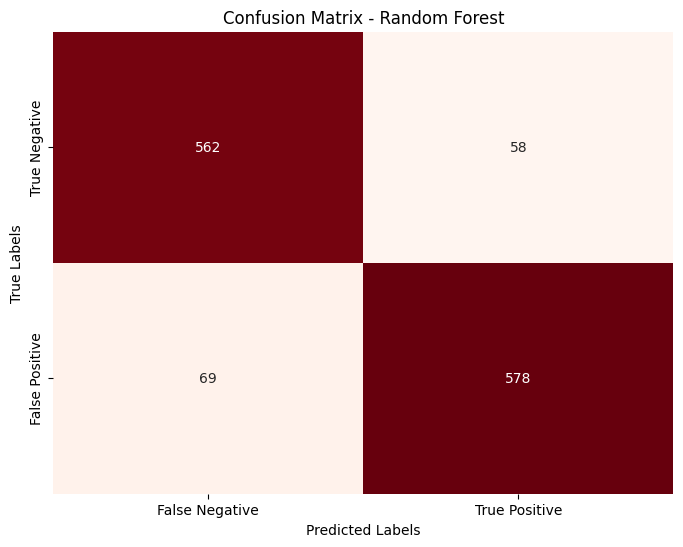

In [50]:
#Checking the performance of the model

#Making prediction on test set
y_pred = classifier_rf.predict(x_test_vector)
#checking the accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#checking the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the categories for the confusion matrix
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Convert confusion matrix to a DataFrame
confusion_df = pd.DataFrame(confusion_mat, index=categories[:2], columns=categories[2:])

# Plot the confusion matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#***Comparing Decision Tree and Random Forest***

>*Random forest outperforming decision tree with the default parameters. Without performing any hyperparameter tuning the Random Forest is giving an Accuracy of 89% and type-1 and type-2 errors are having a smaller gap.*

## ***Recurrent Neural Network (RNN)***
****

*   *RNN is a type of neural network that is designed to handle sequential data. This means it can process data in a sequence, like sentences in natural language, time series data, music, or speech.*
* *Traditional feedforward neural networks process input data in one direction and do not have memory. RNNs, on the other hand, have loops in their architecture, which allows them to maintain internal states, making them suitable for sequential data processing.*

#***LSTM***
***

>*LSTM stands for Long Short Term Memory. It's a family of RNN (Recurrent Neural Network). The main drawback of conventional RNN is it does suffer from vanishing and exploding gradient problem. For this reason it cant not captaure long term dependency. To solve this problem LSTM comes into picture. It has three different gates. Input gate, output gate and memory gates. Memory gate is reponsible for hondling informaiton about the previous time stamp which helps to hold the information can enables long term dependency.*

>*Reference:* [*Understanding LSTM Networks*](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

> *In LSTM information flows in one direction. So it holds dependency in one direction. But for text processing task sometimes to give a word in nth time stamps both (n-1)th and (n+1)th time stamps information is needed. It can be done using Bidirectional LSTM. Here information flows not only forward direction but also reverse direction also. As a result it can holds information in both the direction enabling long term dependency in both the direction.In a standard LSTM, the hidden state of the model is updated based on the input sequence in the forward direction only, from left to right. However, in a BiLSTM, there are two sets of hidden states, one for the forward direction and one for the backward direction, which are updated separately based on the input sequence in both directions, from left to right and from right to left.*

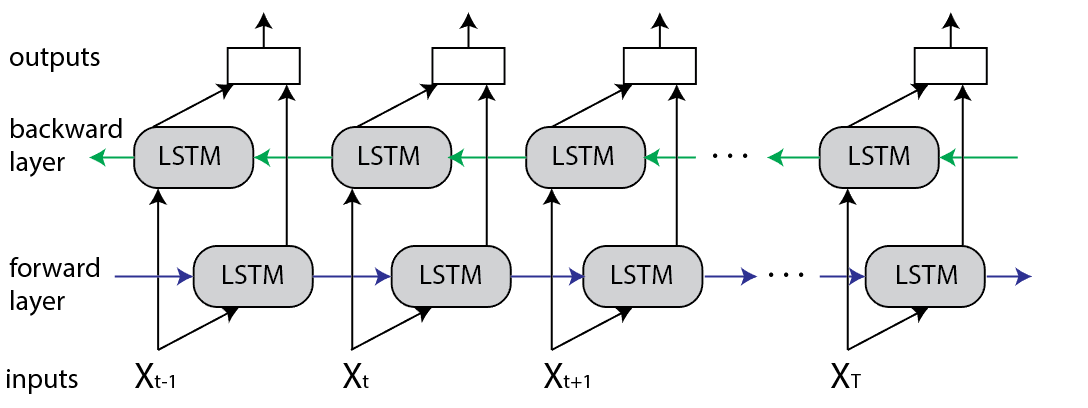

>*Reference:* [*Complete Guide to RNN, LSTM, and Bidirectional LSTM*](https://dagshub.com/blog/rnn-lstm-bidirectional-lstm/)

#***Tokenization and other preprocessing***

> *Tokenization: Tokenization is the process of breaking down a text into individual words or tokens. This step is important because it reduces the complexity of the text data and makes it easier for a machine learning algorithm to process. Tokenization is a fundamental step in many natural language processing tasks, such as sentiment analysis, text classification, and machine translation.*

> *Vocabulary size limitation: Limiting the vocabulary size to the most frequent words is important because it reduces the dimensionality of the data and prevents overfitting. By focusing on the most frequent words, the model can learn the most important features of the text data and avoid being influenced by noise or irrelevant data.*

> *Padding and truncation: Padding and truncation are important because they ensure that all the reviews have the same length, which is required for training neural networks. By setting a fixed length for the reviews, we are able to create a consistent input size for the neural network. Padding with zeros ensures that shorter reviews are the same length as longer reviews, and truncation ensures that longer reviews are cut down to the same length.*

> *Word-to-index mapping: The word-to-index mapping is important because it allows us to represent the text data as sequences of integers, which can be fed into a neural network. By mapping each word to a unique integer value, we can represent the text data in a numerical format that can be processed by the model.*

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer #importing the tokenizer object
from tensorflow.keras.preprocessing.sequence import pad_sequences # to perform padding

# The maximum number of words to be used. (most frequent)
MAX_Number_of_WORDS = 60000

# Max number of words in each news.
MAX_lenght_of_sequeunce = 250

# fixing the dimention of the word embedding vector
Embedding_Dimention = 100

# Create a tokenizer object with specified parameters
tokenizer = Tokenizer(num_words=MAX_Number_of_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(dataset_model['title_text'].values)

# Get the word-to-index mapping for the tokenizer
word_index = tokenizer.word_index

# Print the number of unique tokens in the vocabulary
print('Found %s unique tokens.' % len(word_index))

# Convert the text data to sequences of integers
X = tokenizer.texts_to_sequences(dataset_model['title_text'].values)

# Pad or truncate sequences to a fixed length
X = pad_sequences(X, maxlen=MAX_lenght_of_sequeunce)

# Print the shape of the data tensor
print('Shape of data tensor:', X.shape)

2024-03-08 11:25:13.742080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 11:25:13.742417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 11:25:13.888913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 58551 unique tokens.
Shape of data tensor: (6335, 250)


#***Splitting the dataset***
***
>*Here we are splitting the entire dataset into train, test and validation test. Train and validation is to check the performance of the model while training after that testset will be used to check the performance of the model after training.*

In [52]:
# Map "positive" and "negative" to 1 and 0, respectively
Y= dataset_model["label"]

# Split the data into training and testing sets (80/20 split)
train_texts, rest_texts, train_labels, rest_labels = train_test_split(X,
                                                                      Y,
                                                                      train_size=0.8,
                                                                      random_state=42)

# Split the training data into training and validation sets (80/10/10 split)
test_texts, val_texts, test_labels, val_labels = train_test_split(rest_texts,
                                                                    rest_labels,
                                                                    test_size=0.5,
                                                                    random_state=42)

# Print the shape of each split
print("Shape of training texts: ", train_texts.shape)
print("Shape of training labels: ", train_labels.shape)
print("Shape of validation texts: ", val_texts.shape)
print("Shape of validation labels: ", val_labels.shape)
print("Shape of testing texts: ", test_texts.shape)
print("Shape of testing labels: ", test_labels.shape)

Shape of training texts:  (5068, 250)
Shape of training labels:  (5068,)
Shape of validation texts:  (634, 250)
Shape of validation labels:  (634,)
Shape of testing texts:  (633, 250)
Shape of testing labels:  (633,)


##***Model Building: Neural Network Architecture***
***
>*The model building process involves constructing a neural network architecture with the following steps:*

>***1.Declaring the Sequential Model:***
*We begin by declaring a Sequential model, which allows us to stack layers sequentially.*

>***2.Adding an Embedding Layer:***
*An Embedding layer is added to find the semantic representation of words and cluster them based on their meaning. It helps in understanding the context by creating word embeddings with a dimension of 100.*

>***3.SpatialDropout1D Layer:***
*A SpatialDropout1D layer is added to prevent overfitting. Unlike regular dropout, which drops out individual elements of the embedding vectors, SpatialDropout1D drops out entire columns of the embedding matrix. This helps in preserving the complex relationships among the word features.*

>***4.Bidirectional LSTM Layer:***
*The first bidirectional LSTM layer with 64 hidden units is added. Dropout of 0.2 and recurrent dropout of 0.2 are applied to prevent overfitting and enhance model generalization.*

>***5.Dense Layers:***
*Two dense layers are added to capture complex relationships among the features. The first dense layer has 64 units and uses the Rectified Linear Unit (RELU) activation function to improve non-linearity in the model.*

>***6.Output Layer:***
*The final layer with 1 unit and a sigmoid activation function is used to predict the binary target variable, indicating TRUE or FALSE for the news article.*

>***7.Optimizer and Loss:***
*The Adam optimizer is used for optimization, and binary cross-entropy is chosen as the loss function to compute the loss during training.*

>***8.Performance Metric:***
*Accuracy is used as a metric to evaluate the training performance of the model.*

>*By following these steps and configuring the appropriate layers and parameters, we can build a neural network model capable of predicting the nature of news articles.*

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional, SpatialDropout1D
# Sequential Model
model = Sequential()

# Embeddidng layer
model.add(Embedding(MAX_Number_of_WORDS, Embedding_Dimention)) # to perform word embedding

# Add a dropout layer to randomly drop some of the input, which can help prevent overfitting
model.add(SpatialDropout1D(0.2))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(32,dropout=0.2, recurrent_dropout=0.2)))

# Dense layers
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##***Training the model***
***

In [54]:
'''from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

# Define the search space for hyperparameters
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lstm_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.5],
    'dense_units': [64, 128, 256],
    'batch_size': [32, 64, 128]
}

# Define the model architecture
def create_model(learning_rate=0.001, lstm_units=128, dropout_rate=0.5, dense_units=128):
    model = Sequential()
    model.add(Embedding(MAX_Number_of_WORDS, Embedding_Dimention, input_length=X.shape[1]))
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate)))
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam(learning_rate==learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the Keras model
model = KerasClassifier(build_fn=create_model, epochs=10, verbose=1)

# Define the search strategy
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)

# Fit the grid search to the data
grid_result = grid.fit(train_texts, train_labels, validation_data=(val_texts, val_labels), callbacks=[EarlyStopping(patience=2)])

# Print the best score and parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_.model
test_loss, test_acc = best_model.evaluate(test_texts, test_labels, verbose=0)
print("Test accuracy:", test_acc)'''

'from keras.models import Sequential\nfrom keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout\nfrom keras.optimizers import Adam\nfrom keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\nimport numpy as np\n\n# Define the search space for hyperparameters\nparam_grid = {\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'lstm_units\': [64, 128, 256],\n    \'dropout_rate\': [0.2, 0.5],\n    \'dense_units\': [64, 128, 256],\n    \'batch_size\': [32, 64, 128]\n}\n\n# Define the model architecture\ndef create_model(learning_rate=0.001, lstm_units=128, dropout_rate=0.5, dense_units=128):\n    model = Sequential()\n    model.add(Embedding(MAX_Number_of_WORDS, Embedding_Dimention, input_length=X.shape[1]))\n    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate)))\n    model.add(Dense(units=dense_units, activation=\'relu\'))\n    model.add(Dense(units=1, activation=\'si

In [55]:
import time
start_time = time.time()
epochs=5
batch_size=32
history = model.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_texts, val_labels),verbose=2)
end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Epoch 1/5
159/159 - 23s - 143ms/step - acc: 0.7723 - loss: 0.4701 - val_acc: 0.9164 - val_loss: 0.2235
Epoch 2/5
159/159 - 18s - 115ms/step - acc: 0.9402 - loss: 0.1737 - val_acc: 0.9164 - val_loss: 0.2091
Epoch 3/5
159/159 - 18s - 113ms/step - acc: 0.9779 - loss: 0.0681 - val_acc: 0.9243 - val_loss: 0.2352
Epoch 4/5
159/159 - 20s - 128ms/step - acc: 0.9947 - loss: 0.0206 - val_acc: 0.9211 - val_loss: 0.2936
Epoch 5/5
159/159 - 20s - 128ms/step - acc: 0.9917 - loss: 0.0341 - val_acc: 0.9101 - val_loss: 0.2790
Training time: 102.45949530601501 seconds


**Checking Train loss and Validation loss with respect to epochs**

In [56]:
# Plot training and validation loss
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

##***Checking train accuracy and Validation Accuracy with respect to epochs***
***

In [57]:
# Plot training and validation accuracy
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['acc'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['val_acc'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_acc.show()

##***Checking the performance on the test set***
***

In [58]:
performance = model.evaluate(test_texts, test_labels)
print('Test Set Loss: {:0.3f}\ n  Test Set Accuracy: {:0.4f}'.format(performance[0],performance[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.8695 - loss: 0.4215
Test Set Loss: 0.414\ n  Test Set Accuracy: 0.8736


##***Overall Performance of the LSTM Model - Evaluating Overfitting and Underfitting***
***

>*The overall performance of the LSTM model indicates a favorable outcome. To assess the model's performance, two critical conditions are considered: overfitting and underfitting.*

>*In the case of overfitting, the validation accuracy is significantly lower than the training accuracy. This scenario suggests that the model has learned the training data too well, resulting in poor generalization to unseen data. Conversely, underfitting occurs when both the validation and training accuracies are low, indicating that the model struggles to capture the underlying patterns in the data.*

>*In our case, the LSTM model demonstrates comparable accuracies for both the training and validation sets. This implies that the model performs well without experiencing significant overfitting or underfitting. However, to further improve the performance, it is possible to explore additional regularization techniques and potentially reduce the complexity of the model. These actions can help minimize the gap between the validation and training accuracies, enhancing the model's generalization capabilities.*

>*By considering these factors, we can conclude that the LSTM model exhibits promising performance in predicting the nature of news articles. With further refinements, such as incorporating additional regularization techniques and optimizing the model complexity, the model's overall accuracy and generalization capacity can be enhanced.*

##***TRANSFORMER: Overcoming Limitations of LSTM***
***

>*The Transformer architecture represents a significant advancement in natural language processing compared to traditional LSTM models. While LSTM models have improved long-term dependency modeling, they still possess certain limitations that the Transformer architecture addresses:*

>***1.Sequential Computation:*** *LSTM models process input sequentially, word by word. In contrast, the Transformer architecture enables parallel computation, processing the entire input text simultaneously. This parallelism significantly speeds up computation, making it more efficient.*

>***2.Fixed-Length Context:*** *LSTMs rely on a fixed-length context window, which restricts their ability to capture long-term dependencies in the input sequence. In contrast, Transformer-based models leverage self-attention and layer normalization techniques to dynamically attend to different parts of the input sequence. This allows Transformers to capture longer-term dependencies and model context more effectively.*

>***3.Vanishing Gradients:*** *LSTMs can encounter vanishing gradient problems, particularly when dealing with longer text sequences (e.g., beyond 100 words). The vanishing gradient problem arises when gradients used to update model weights become very small, impeding effective training. Transformers mitigate this issue through the self-attention mechanism and layer normalization, which help minimize vanishing gradients and facilitate more stable and efficient training.*

>By addressing these limitations, the Transformer architecture offers significant advantages over LSTM models. Its ability to process input in parallel, capture longer-term dependencies, and mitigate vanishing gradient problems makes it a powerful tool for modeling and understanding natural language.



##***Model Introduction - Transformer Architecture for Fake News Detection***
***

>*The Transformer model, as described in the "Attention is All You Need" paper, consists of an Encoder stack and Decoder stack. However, for the task of Fake News Detection, which is a sequence-to-one model where the input is news text and the output is binary classification, only the encoder block is required.*
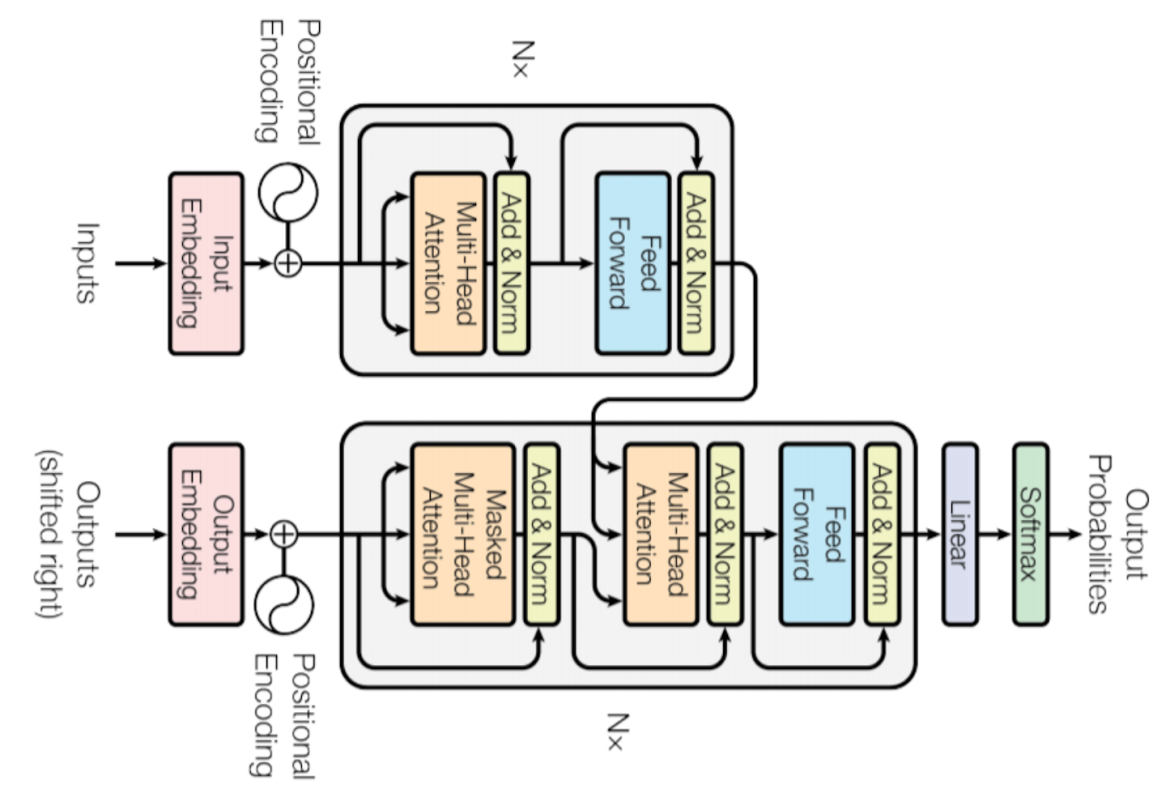

>*The encoder block comprises several components:*

>***1.Word Embedding:*** *Word embedding is used to convert words into vector representations. Each word is assigned an embedding dimension, which is a tunable hyperparameter. Word embedding helps to capture the meaning of words and cluster similar words together.*

>***2.Positional Encoding:*** *Since the Transformer architecture lacks recurrent connections like RNNs, positional encoding is introduced to incorporate positional information about each word in the sentence. Positional encoding is added to the word embedding vector to provide the model with an understanding of word order.*

>***3.Multi-Head Attention:*** *Self-attention is employed to determine the contextual representation of a word in a sentence. It calculates the attention weight of a query word with respect to other words in the sentence. Multiple self-attention heads work in parallel to capture different relationships among words. The outputs of the self-attention heads are weighted and concatenated before being passed to the next feed-forward layer.*

>***4.Layer Normalization:*** *Layer normalization is used to normalize the activation of each layer in the Transformer. It reduces the dependency of the network on the scale of input features and stabilizes the distribution of activations in the feature dimensions. This helps improve convergence during the training process.*

>***5.Feed-Forward Layer:*** *The output of the attention layer undergoes layer normalization and is then passed through a feed-forward layer. The feed-forward layer applies a non-linear transformation to the outputs of the self-attention mechanism. This enables the Transformer model to capture complex, non-linear relationships between input and output sequences, as well as between input features.*

>By incorporating these components, the Transformer model offers a powerful architecture for Fake News Detection, allowing it to effectively capture the contextual meaning of words and capture intricate relationships within the news text.

##***Implementation of the Model - Transformer Architecture for Fake News Detection***
***

>*The implementation of the Transformer model for Fake News Detection involves several steps:*

>***1.Transformer Class:***
*The Transformer class is initially implemented, comprising components such as multi-head attention, feed-forward layer, layer normalization, and dropout layer. These components contribute to the overall functionality and performance of the Transformer model.*

>***2.Call Function:***
Inside the Transformer class, a call function is defined to pass the model's output as input to subsequent layers. It also incorporates skip connections, which help alleviate the vanishing gradient problem by allowing gradients to flow directly to earlier layers.

>***3.TokenAndPositionEmbedding Class:***
*The TokenAndPositionEmbedding class is defined to perform word embedding along with positional encoding. This step helps represent each word in the input text as a vector and adds positional information to the embeddings.*

>***4.Transformer Model for Text Classification:***
*The transformer model is constructed specifically for text classification. Global Average Pooling is utilized to reduce dimensionality and extract important features from the encoded sequence. Dropout with a probability of 10% is applied to mitigate overfitting.*

>***5.Fully Connected Layer:***
*A fully connected layer with 64 neurons is added to capture non-linear relationships and complex patterns among different features in the input data. This layer helps improve the model's ability to understand and classify news articles effectively.*

>***6.Output Layer:***
*The output layer consists of a dense layer with 1 neuron and a sigmoid activation function. This setup facilitates binary classification, enabling the model to predict whether the news article is fake or genuine. The model is then compiled using the Adam optimizer and accuracy as the evaluation metric.*

>*By following these steps, the Transformer model is implemented and ready for training and evaluation on the Fake News Detection task.*

##***Importing the Keras and Tensorflow Library***
***

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##***Creating Transformer block***
***

In [60]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6) #epsilon=1e-6 to avoid zero division error during normalization
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) #skip connection
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training) #skip conneciton
        return self.layernorm2(out1 + ffn_output)

##***Creating embeddings with positional Encodding***
***

In [61]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

##***Preparing the data for the model***
***

In [62]:
# Define the Transformer model for text classification
vocab_size = 60000  # Define your vocabulary size
maxlen = 250  # Define your maximum sequence length
embed_dim = 100  # Define your embedding dimension
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in the feed-forward network

##***Developing the model***
***

In [63]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x, training=True)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_transformer = keras.Model(inputs=inputs, outputs=outputs)

##***Compiling the model***
***

In [64]:
model_transformer.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_transformer.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding    │ (None, 250, 100)       │     6,025,000 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 250, 100)       │        87,632 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 100)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,119,161 (23.34 MB)

 Trainable params: 6,119,161 (23.34 MB)

 Non-trainable params: 0 (0.00 B)

##***Training the model and computing the training time***
***

In [65]:
import time
start_time = time.time()
history_transformer = model_transformer.fit(train_texts, train_labels,
                    batch_size=64, epochs=5,
                    validation_data=(val_texts,val_labels)
                   )
end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 339ms/step - accuracy: 0.7249 - loss: 0.5196 - val_accuracy: 0.9022 - val_loss: 0.2435
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step - accuracy: 0.9497 - loss: 0.1427 - val_accuracy: 0.9274 - val_loss: 0.1620
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9211 - val_loss: 0.2824
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - accuracy: 0.9979 - loss: 0.0107 - val_accuracy: 0.9338 - val_loss: 0.2418
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9385 - val_loss: 0.2736
Training time: 192.960782289505 seconds


##***Checking the performance of the mode on the test set***
***

In [66]:
performance_transformer = model_transformer.evaluate(test_texts, test_labels)
print('Test Set Loss: {:0.3f}\ n  Test Set Accuracy: {:0.4f}'.format(performance_transformer[0],performance_transformer[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9286 - loss: 0.3487
Test Set Loss: 0.420\ n  Test Set Accuracy: 0.9179


##***Checking Train loss and Validation loss with respect to epochs***
***

In [67]:
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

##***Checking Train Accuracy and Validation Accuracy with respect to epochs***
***

In [68]:
# Plot training and validation accuracy
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['accuracy'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_acc.show()

##***Making a single prediciton using Transformer Model***
***

In [69]:
news="It doesn't get much better than that – on a resume. Former U.S. presidents – even the ones who lost re-election or suffered from low approval ratings – tend to do very well after leaving office, scoring lucrative book deals and other perks.But for Donald Trump, four years in the White House have left him arguably worse off. His eponymous brand has been damaged, his finances took a hit during his presidency, and – no matter how his legal problems are resolved – the twice-impeached Trump will go down in history as the first U.S. president to be indicted.I still wonder, if when he began the campaign in 2015, he actually did so with the idea of winning, says Jeffrey Engel, founding director of the Center for Presidential History at Southern Methodist University. One has to imagine that, like so many politicians, he was trying to build his brand."
#news="False voting machine claims Claims that voting machines flip votes from Republicans to Democrats and vice versa have dogged US elections for years. Yet to date there is no evidence to suggest that election tampering has taken place.A handful of posts recently began circulating on social media from voters in Texas who claimed that voting machines were switching their votes from Democrat to Republican. One tweet read: Texas GOP up to the same dirty tricks. Local county officials and the secretary of state's office all confirmed receiving a small handful of reports relating to voters experiencing difficulties with touch screen machines, and have encouraged voters to review their ballots before submitting them."
clean_news=clean_text(news)
# Convert the text data to sequences of integers
X_single = tokenizer.texts_to_sequences([clean_news])

# Pad or truncate sequences to a fixed length
X_single = pad_sequences(X_single, maxlen=MAX_lenght_of_sequeunce)


print(X_single.shape)

(1, 250)


In [70]:
output = model_transformer.predict(X_single, batch_size=1, verbose=2)[0]

print(output)

if output>=0.5:
  print("It's a real News")
else:
  print("It's a fake News")

1/1 - 0s - 154ms/step
[0.99082047]
It's a real News


##***Making a single prediciton using LSTM Model***
***

In [71]:
output_LSTM = model.predict(X_single, batch_size=1, verbose=2)[0]

print(output_LSTM)

if output_LSTM>=0.5:
  print("It's a real News")
else:
  print("It's a fake News")

1/1 - 0s - 321ms/step
[0.89039147]
It's a real News


##***Performance Comparison: LSTM vs. Transformer***
***
>*When comparing the performance of LSTM and Transformer models for Fake News Detection, both models achieve accuracy above 90%. However, the Transformer model, with just one encoder block and two multi-head attention blocks, exhibits comparable or even superior accuracy.*

>*In terms of computation time, the Transformer model outperforms LSTM. This is because the Transformer architecture utilizes parallel processing, enabling faster training compared to the sequential nature of LSTM. The parallel computation in the Transformer model contributes to its faster overall computation time.*

>*Considering both performance and computation time, the Transformer model, despite its moderate complexity, demonstrates superior performance and efficiency compared to the bi-directional LSTM model. The Transformer's ability to capture long-term dependencies through self-attention, coupled with its parallel processing capabilities, makes it an advantageous choice for Fake News Detection tasks.*


##***Reference:***
***
>*1.* [*Text classification with Transformer*](https://keras.io/examples/nlp/text_classification_with_transformer/)

>*2.* [*False and misleading claims about the vote go viral*](https://www.bbc.com/news/63486497)

>*3.* [*Transformers For Text Classification*](https://blog.paperspace.com/transformers-text-classification/)

>*4.* [*The Illustrated Transformer*](http://jalammar.github.io/illustrated-transformer/)

>*5.* [*A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis (using Python)*](https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/)




